# Author : Shubham Dattatray Chaudhari

# Data Analytics Intern at Let's Grow More
# LGMVIP march23
# TASK 3
# TASK 2 : Intermediate Level
# Prediction Using Decision Tree Algorithm

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dataset=pd.read_csv('IRIS.csv')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
dataset.shape

(150, 5)

In [12]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visualisation

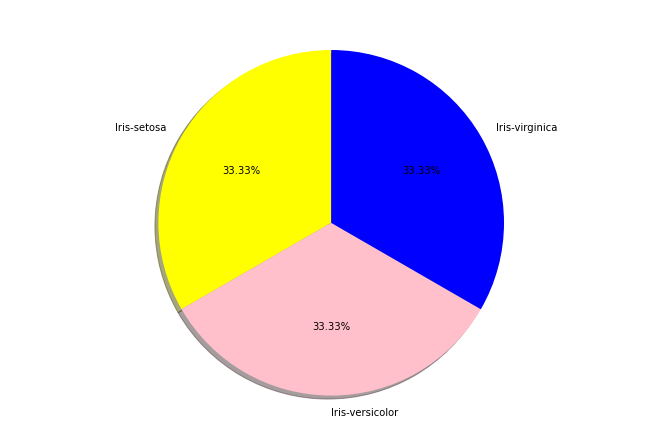

In [22]:
fig=plt.figure(figsize=(9,6))
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
colors=['Yellow','Pink','blue']
sp=dataset['species'].unique()
ct=dataset['species'].value_counts().tolist()
plt.pie(ct, labels=sp,autopct='%1.2f%%', colors=colors, shadow=True, startangle=90)
plt.show()

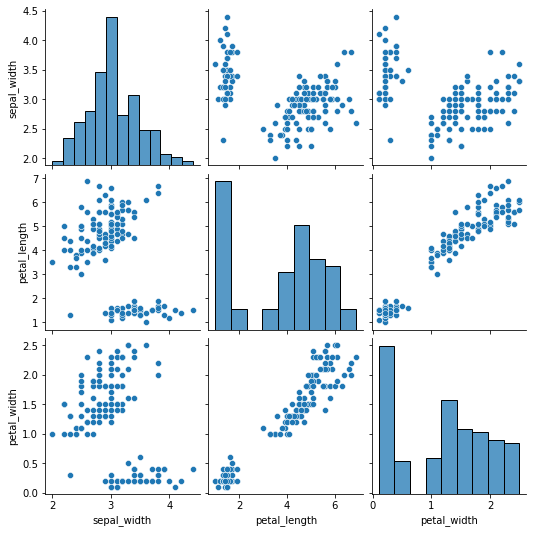

In [17]:
sns.pairplot(dataset.iloc[:,1:])

In [23]:
dataset.skew()

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

<AxesSubplot:>

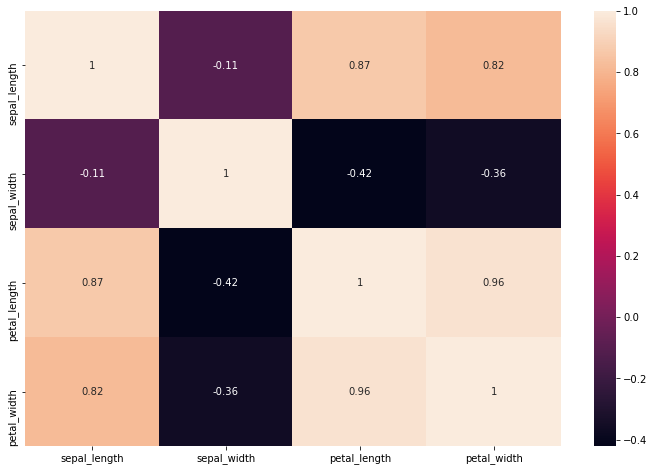

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(),annot=True)

<AxesSubplot:>

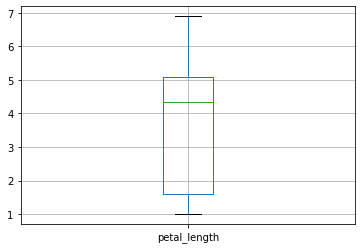

In [31]:
dataset.boxplot(column='petal_length')

# Splitting data

In [32]:
x=dataset.drop('species',axis=1)
y=dataset['species']
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',random_state=0)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [36]:
dt.score(x_test,y_test)

0.9777777777777777

# Accuracy=97.78%

# Decision Tree

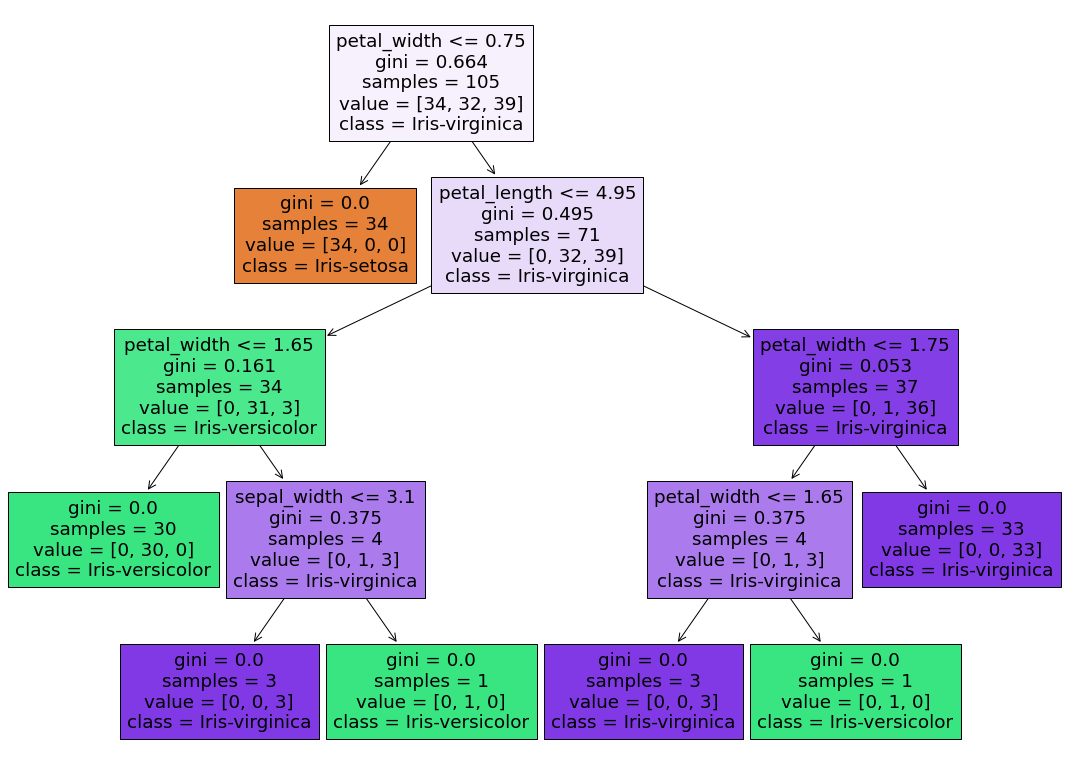

In [37]:
features=dataset.columns[:-1]
classes=dataset['species'].unique().tolist()
from sklearn.tree import plot_tree
plt.figure(figsize=(19,14))
plot_tree(dt,feature_names=features,class_names=classes,filled=True)
plt.show()